# CEED Embedding Analysis

visualisation of embeddings in low dimentioanl space, evaluation of dimentionality
reduction methods and pre-scaling methods for data

evaluation of clusters found from the data

## Imports and data loading

In [1]:
#imports
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import scipy as sp
import scipy.signal

In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

In [3]:
#load data and labels
data_path = '/home/noah/code/400neuron_200spike_celltype_singlechan_dataset/spikes_train.npy'

In [4]:
embeddings = np.load('/home/noah/code/CEED/CEED/notebooks/ceed_embeddings.npy')
embeddings.shape

(80000, 5)

## Dimentionality Reduction

### PCA

In [5]:
_pca = PCA(n_components=3)
_pca.fit(embeddings)
print('total varience explained by PCs = ', np.sum(_pca.explained_variance_ratio_))
print('variences: ', _pca.explained_variance_ratio_)
print(_pca.singular_values_)

pca_reduced_data = _pca.transform(embeddings)

total varience explained by PCs =  0.7909848027306431
variences:  [0.35163457 0.23402582 0.20532441]
[110.819885  90.407364  84.68221 ]


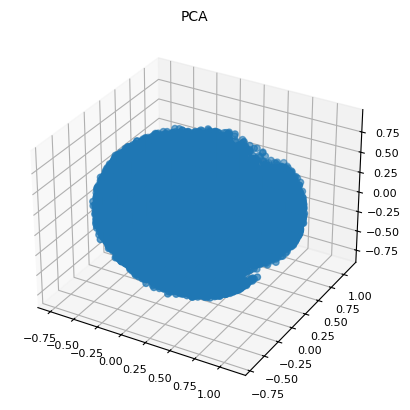

In [6]:
# %matplotlib ipympl
from mpl_toolkits.mplot3d import axes3d    

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(pca_reduced_data[:,0], pca_reduced_data[:,1], pca_reduced_data[:,2])
#nothing obvious in 3d scatter of PCA
plt.title('PCA')
plt.show()

### UMAP

In [7]:
import umap

2023-10-03 14:56:03.962744: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 14:56:03.962789: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 14:56:03.962816: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-03 14:56:03.969895: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 14:56:04.754519: W tensorflow/compiler/

In [8]:
manifold = umap.UMAP(random_state=42, n_components=2).fit(embeddings)
X_reduced = manifold.transform(embeddings)
print(X_reduced.shape)
#this is really really slow...

/home/noah/mambaforge/envs/ceed2/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(80000, 2)


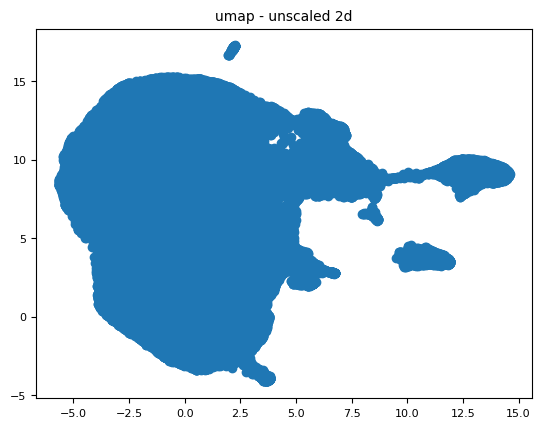

In [9]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2])
# #nothing obvious in 3d scatter of PCA
plt.title('umap - unscaled 2d')
plt.show()

### Scaling Data for Better UMAP Performance

In [10]:
#unsure what is the most appropriate scaling 
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#### Standard Scaler

In [11]:
scaled_data = StandardScaler().fit_transform(embeddings)
manifold_scaled = umap.UMAP(random_state=42, n_components=2).fit(scaled_data)
X_reduced_scaled = manifold_scaled.transform(scaled_data)
#Umap is much slower in this new environment... maybe reinstall umap learn for better performance

/home/noah/mambaforge/envs/ceed2/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


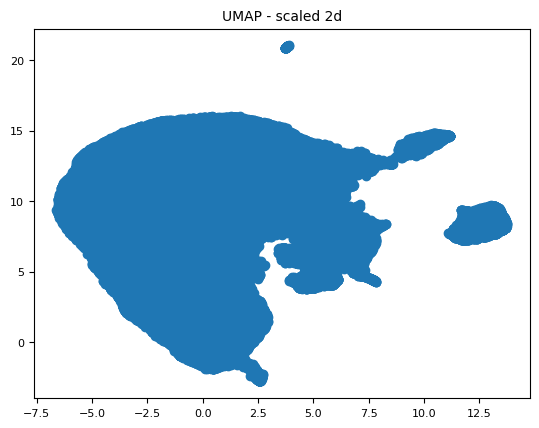

In [12]:
plt.scatter(X_reduced_scaled[:, 0], X_reduced_scaled[:, 1])
plt.title('UMAP - scaled 2d')
plt.show()

In [13]:
scaled_data = StandardScaler().fit_transform(embeddings)
manifold_scaled = umap.UMAP(random_state=42, n_components=3).fit(scaled_data)
X_reduced_scaled = manifold_scaled.transform(scaled_data)

/home/noah/mambaforge/envs/ceed2/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


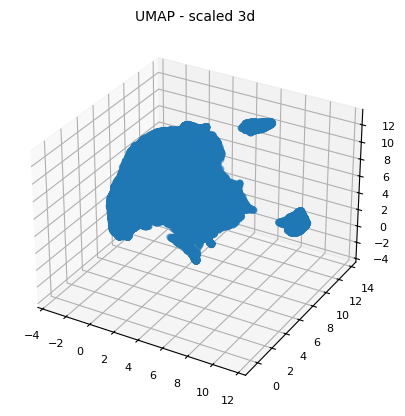

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_reduced_scaled[:,0], X_reduced_scaled[:,1], X_reduced_scaled[:,2])
#nothing obvious in 3d scatter of PCA
plt.title('UMAP - scaled 3d')
plt.show()

#### Quantile Scaler

In [15]:
qscaled_data = QuantileTransformer(n_quantiles=50).fit_transform(embeddings)
manifold_q = umap.UMAP(random_state=42, n_components=3).fit(qscaled_data)
X_reduced_scaled_q = manifold_q.transform(qscaled_data)

/home/noah/mambaforge/envs/ceed2/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


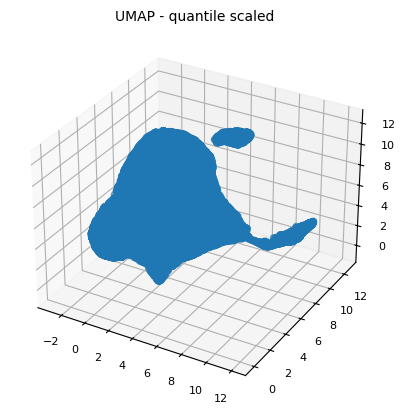

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_reduced_scaled_q[:,0], X_reduced_scaled_q[:,1], X_reduced_scaled_q[:,2])
#nothing obvious in 3d scatter of PCA
plt.title('UMAP - quantile scaled')
plt.show()

In [17]:
manifold_q_2d = umap.UMAP(random_state=42, n_components=2).fit(qscaled_data)
X_reduced_scaled_q_2d = manifold_q_2d.transform(qscaled_data)

/home/noah/mambaforge/envs/ceed2/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


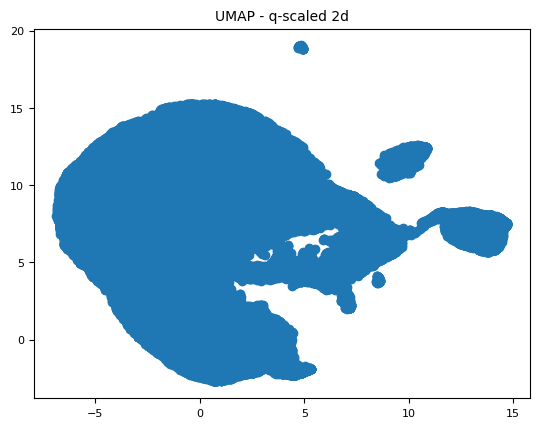

In [18]:
plt.scatter(X_reduced_scaled_q_2d[:, 0], X_reduced_scaled_q_2d[:, 1])
plt.title('UMAP - q-scaled 2d')
plt.show()

## Clustering

In [19]:
from sklearn.cluster import KMeans

In [58]:
kmeans=KMeans(n_clusters=14,init='k-means++',n_init=10, max_iter=100)
kmeans.fit(embeddings)

KMeans(max_iter=100, n_clusters=14, n_init=10)

In [59]:
cluster_labels = kmeans.labels_


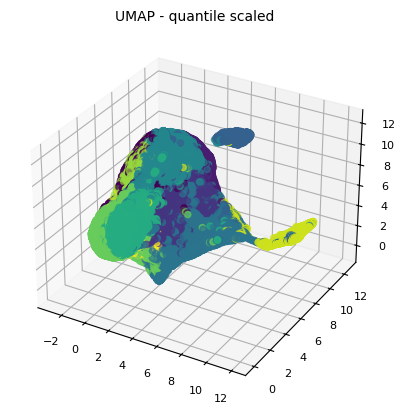

In [60]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_reduced_scaled_q[:,0], X_reduced_scaled_q[:,1], X_reduced_scaled_q[:,2], c = cluster_labels)
#nothing obvious in 3d scatter of PCA
plt.title('UMAP - quantile scaled')
plt.show()

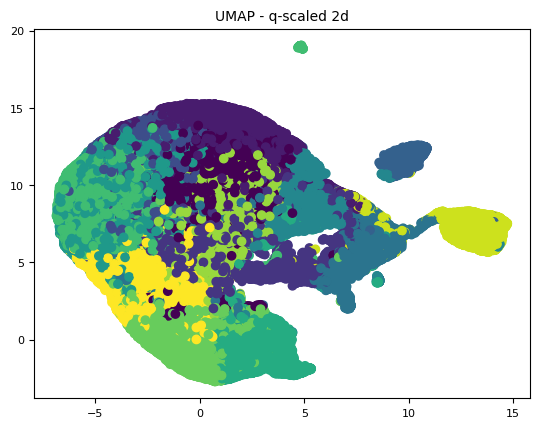

In [61]:
plt.scatter(X_reduced_scaled_q_2d[:, 0], X_reduced_scaled_q_2d[:, 1], c = cluster_labels)
plt.title('UMAP - q-scaled 2d')
plt.show()

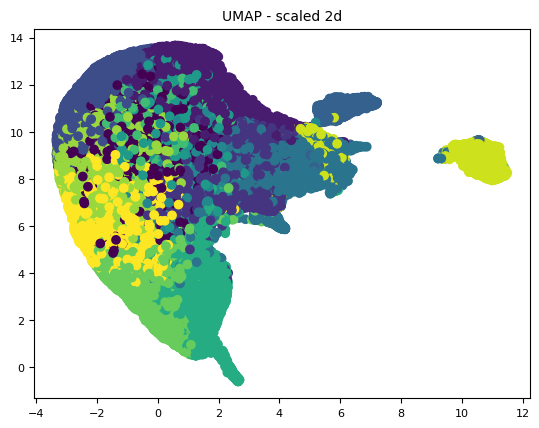

In [62]:
plt.scatter(X_reduced_scaled[:, 0], X_reduced_scaled[:, 1], c = cluster_labels)
plt.title('UMAP - scaled 2d')
plt.show()

### Spikes in each cluster

In [63]:
spikes = np.load(data_path) #ibl data so probably arranged as (neuron, channels, time)
print(spikes.shape)
spike_data = np.array([neuron[0, :] for neuron in spikes])
print(spike_data.shape)

(80000, 1, 121)
(80000, 121)


In [72]:
#load spikes here for inspection
labelled_spikes = list(zip(spike_data, cluster_labels, embeddings))
labelled_spikes.sort(key = lambda x: x[1])


In [73]:
#separate into clusters based on label - who knows how this works, doesnt seem pythonic

import itertools
import operator
clusters = [list(group) for key,group in itertools.groupby(labelled_spikes,operator.itemgetter(1))]

In [74]:
for i in range(len(clusters)):
    print(len(clusters[i]))

7505
6727
5746
6686
1798
4391
5436
6606
5912
6053
5843
8012
3009
6276


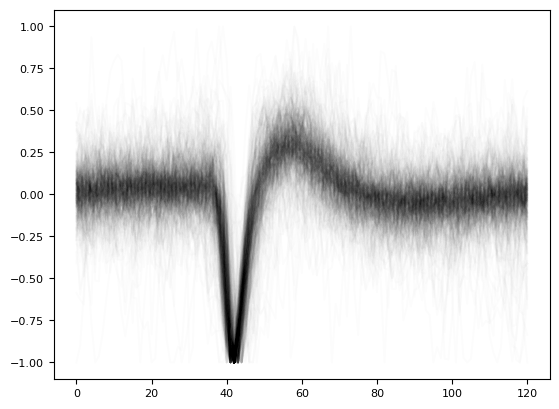

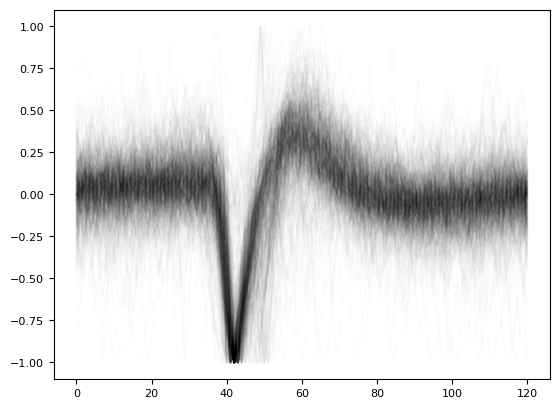

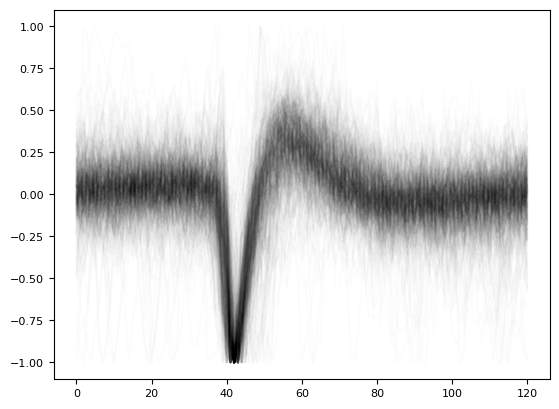

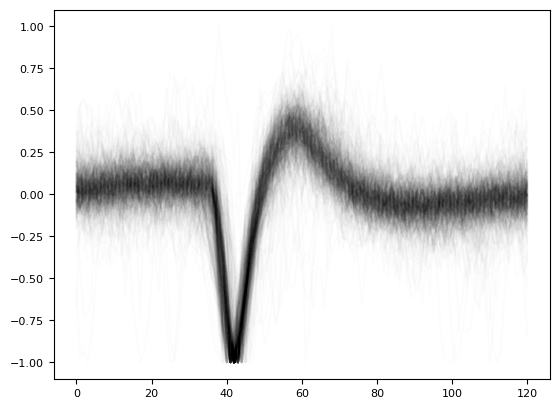

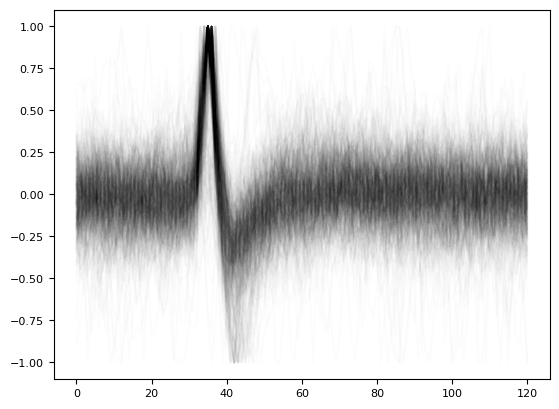

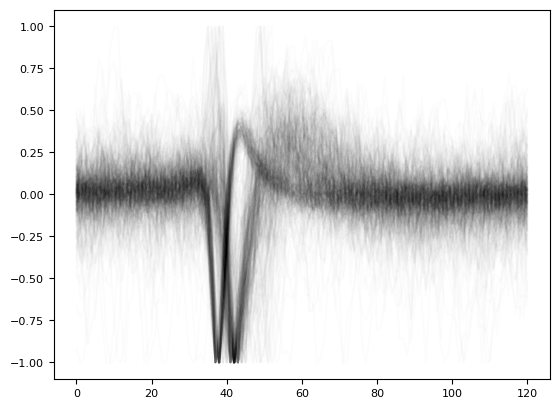

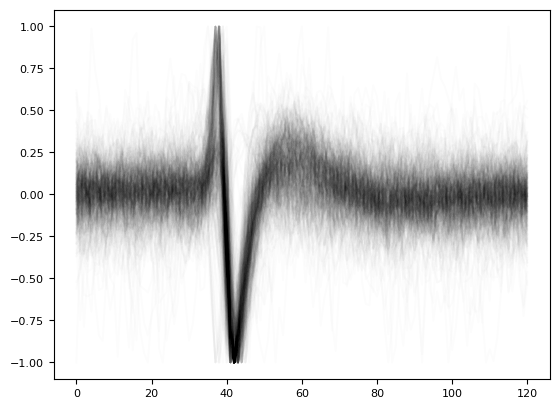

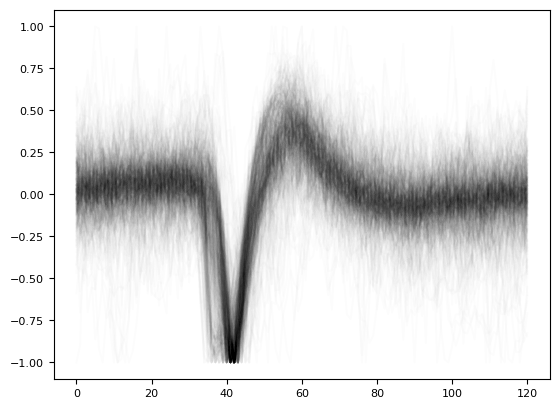

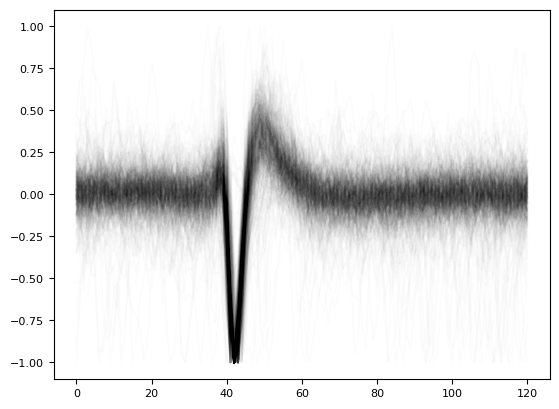

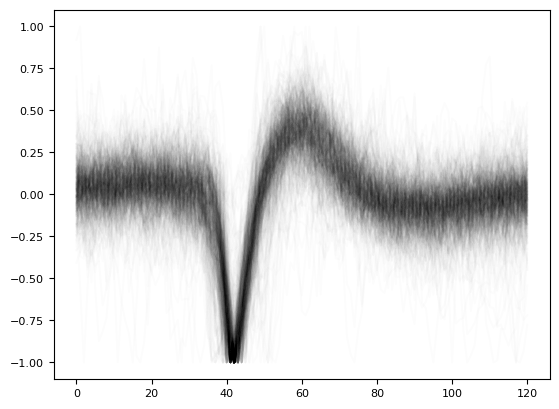

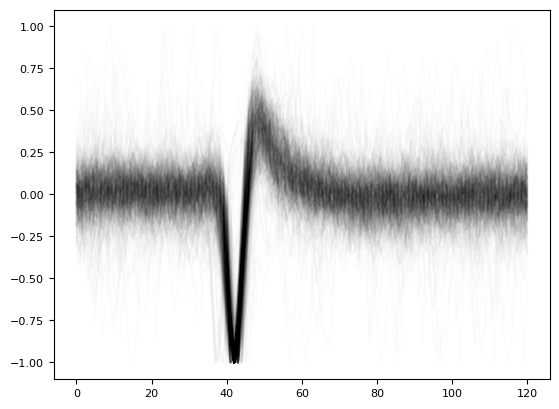

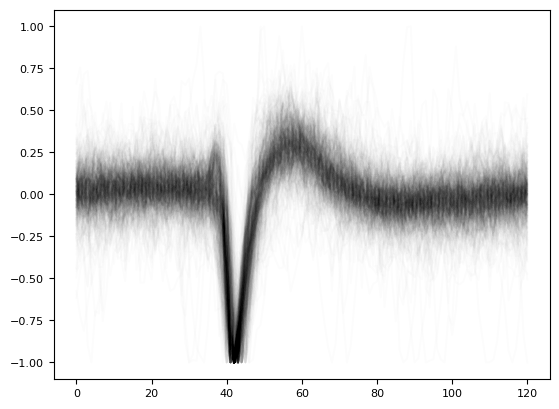

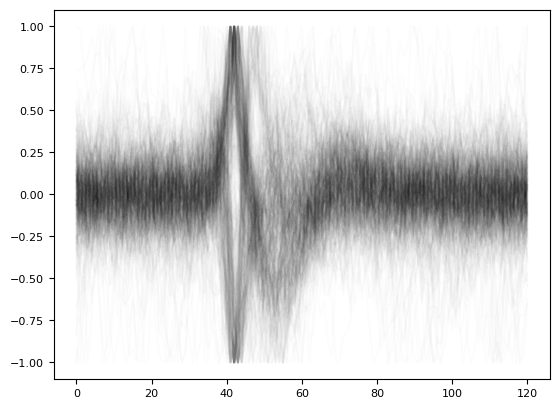

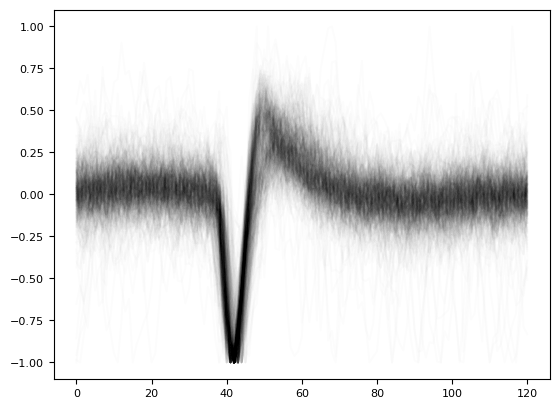

In [76]:
for cluster in clusters:
    for spike, clust, embedding in cluster[0:500]:
        plt.plot(spike, alpha=.01, color='k')
    plt.show()
    

In [70]:
#subplots w templates for each cluster
#median templates of spikes
#z,x feature plot with new dataset
#full covarience gmm instead of kmeans

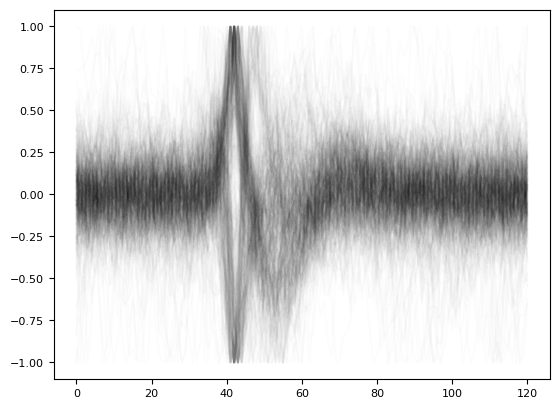

In [123]:
#cluster12 is issue
embeddings12 = []
spikes12 = []
for spike, clust, embedding in clusters[12][0:500]:
    plt.plot(spike, alpha=.01, color='k')
    embeddings12.append(embedding)
    spikes12.append(spike)
plt.show()

In [124]:
_pca_2 = PCA(n_components=3)
_pca_2.fit(embeddings12)
print('total varience explained by PCs = ', np.sum(_pca_2.explained_variance_ratio_))
print('variences: ', _pca_2.explained_variance_ratio_)
print(_pca_2.singular_values_)

pca_reduced_data_12 = _pca_2.transform(embeddings12)

total varience explained by PCs =  0.9018461585939164
variences:  [0.47705774 0.29451541 0.130273  ]
[7.33382047 5.7623391  3.8324104 ]


In [159]:
#use kmeans to separates this directly
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10, max_iter=100)
kmeans.fit(embeddings12)

KMeans(max_iter=100, n_clusters=3, n_init=10)

In [160]:
labels_12 = kmeans.labels_

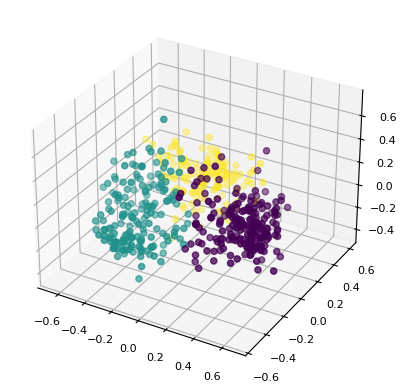

In [161]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_reduced_data_12[:,0], pca_reduced_data_12[:,1], pca_reduced_data_12[:,2], c=labels_12)
plt.show()

In [162]:
# separate data by cluster
labelled12 = list(zip(spikes12, labels_12))
labelled12.sort(key = lambda x: x[1])
clusters_new12 = [list(group) for key,group in itertools.groupby(labelled12,operator.itemgetter(1))]

In [163]:
# len(clusters_new12[2][0][0])

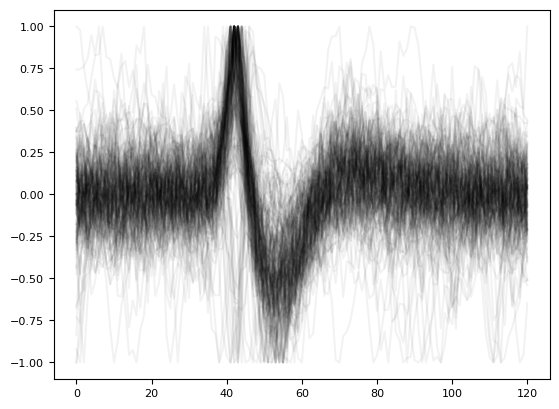

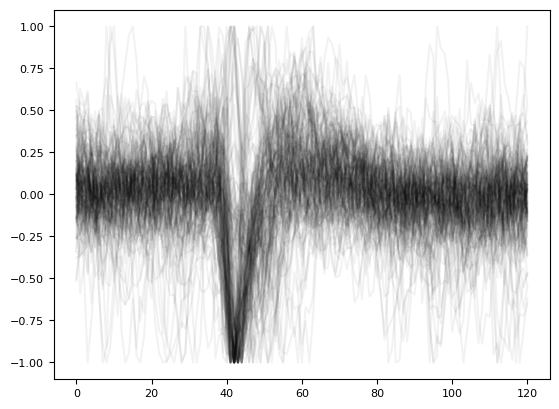

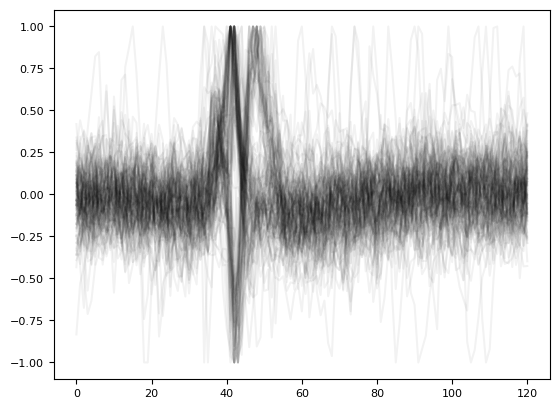

In [164]:
for cluster in clusters_new12:
    for spike, clust in cluster[0:500]:
        plt.plot(spike, alpha=.05, color='k')
    plt.show()